# Objective:
### The objective of this data analysis project is to gain insights into the ecommerce order data of a fictional company. We will analyze customer information, product details, and order history to derive meaningful conclusions that can aid business decision-making.

In [1]:
# Example Python code for connecting to MySQL database using mysql-connector-python
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Example Python code for connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect(
user='root',
password='1234',
host='localhost',
database='ecommerce'
)

In [3]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()

In [4]:

# Query data from the 'customer' table
cursor.execute('SELECT * FROM customer')

#After fetching data from the database we are storing it into Pandas DataFrame
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Query data from the 'product' table and create a data frame
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

# Query data from the 'order_details' table
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

cursor.close()
connection.close()


In [5]:
customer_data.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171
3,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429
4,C1005,Jack,Lake Buena Vista,Jack@gmail.com,8876345678,1520 E Buena Vista Drive,32830


In [6]:
product_data.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,P102,Chair,furniture,Chairs,20000.0,15000.00,10
1,P103,Laptop,Electronics,computer,60000.0,55000.00,50
2,P104,Smartphone,Electronics,phone,45000.0,40000.00,20
3,P105,Blender,Appliance,Electronics,500.0,450.00,10
4,P106,Laptop HP,Electronics,Computers,67200.0,55000.99,50


In [7]:
order_data.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,delivered


DATA CLEANING:

In [8]:
# using the shape function we can know the no. of rows and columns
customer_data.shape

(62, 7)

In [9]:
product_data.shape

(61, 7)

In [10]:
order_data.shape

(76, 8)

In [11]:
#BY using info function we can see the coincise summary of customar dataframe like datatypes, number of non null values and memory usage of each column|
customer_data.info

<bound method DataFrame.info of    customer_id     name              city                  email    phone_no  \
0        C1001    Steve             Tokyo        steve@gmail.com  4567897652   
1        C1002     john            Sydney         john@gmail.com  9987234567   
2        C1003    Peter          Kanagawa  peter.parker@mail.com  9969834567   
3        C1004  Jackson             Tokyo      Jackson@gmail.com  7765834567   
4        C1005     Jack  Lake Buena Vista         Jack@gmail.com  8876345678   
..         ...      ...               ...                    ...         ...   
57       C1063   Sophia             Tokyo       sophia@gmail.com  5432123456   
58       C1064    Ethan  Lake Buena Vista      ethan@example.com  9876123456   
59       C1065   Oliver          Kanagawa        oliver@mail.com  1234987654   
60       C1066     Aria            Sydney         aria@gmail.com  9876543210   
61       C1067    James             Tokyo        james@gmail.com  1234567890   

       

In [12]:
#BY using info function we can see the coincise summary of product dataframe like datatypes, number of non null values and memory usage of each column|
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      61 non-null     object 
 1   product_name    61 non-null     object 
 2   category        61 non-null     object 
 3   sub_category    61 non-null     object 
 4   original_price  61 non-null     float64
 5   selling_price   61 non-null     float64
 6   stock           61 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 3.5+ KB


In [13]:
#BY using info function we can see the coincise summary of order dataframe like datatypes, number of non null values and memory usage of each column|
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      76 non-null     int64         
 1   customer_id   76 non-null     object        
 2   product_id    76 non-null     object        
 3   quantity      76 non-null     float64       
 4   total_price   76 non-null     float64       
 5   payment_mode  76 non-null     object        
 6   order_date    76 non-null     datetime64[ns]
 7   order_status  76 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.9+ KB


In [14]:
# HERE DESCRIBE function provides summary statistics for numerical columns like we can fetch mean,count,min,max,median,standard deviation
customer_data.describe()

,pin_code
count,62.000000
mean,38989.225806
std,29968.018681
min,99.000000
25%,9408.000000
50%,34567.000000
75%,56789.000000
max,98766.000000


In [15]:
# HERE DESCRIBE function provides summary statistics for  columns with object datatype like we can fetch count,unique values,top i.e most frequent values,freq(frequency of the most frequent values).
customer_data.describe(include=object).T

,count,unique,top,freq
customer_id,62,62,C1001,1
name,62,39,Ava,4
city,62,4,Tokyo,22
email,62,52,henry@gmail.com,3
phone_no,62,26,1234567890,11
address,62,57,oo.pp.road,2


In [16]:
#checking missing values(here all output are comes false so,there is no any null values are present in the dataframe)
customer_data.isnull().value_counts()

customer_id  name   city   email  phone_no  address  pin_code
False        False  False  False  False     False    False       62
Name: count, dtype: int64

In [17]:
#checking missing values(here all output are comes false so,there is no any null values are present in the dataframe)
product_data.isnull().value_counts()

product_id  product_name  category  sub_category  original_price  selling_price  stock
False       False         False     False         False           False          False    61
Name: count, dtype: int64

In [18]:
#checking missing values(here all output are comes false so,there is no any null values are present in the dataframe)
order_data.isnull().value_counts()

order_id  customer_id  product_id  quantity  total_price  payment_mode  order_date  order_status
False     False        False       False     False        False         False       False           76
Name: count, dtype: int64

In [19]:
#Displying specially the distribution of missing values if present in category column in product data dataframe(it will provide a count of how many null and non null values exist in the category column)
product_data['category'].value_counts()

category
Electronics    32
Appliance      20
Furniture       8
furniture       1
Name: count, dtype: int64

In [20]:
#replacing the furniture to Furniture

In [21]:
product_data['category']= product_data['category'].replace('furniture','Furniture')

In [22]:
product_data['category'].value_counts()

category
Electronics    32
Appliance      20
Furniture       9
Name: count, dtype: int64

### CHECK FOR CUSTOMER TABLE

In [23]:
# Check for missing values
missing_values_customer_data = customer_data.isnull().sum()

# Ensure data types
data_types_customer_data = customer_data.dtypes

# Print the results
print("customer_data- Missing Values:")
print(missing_values_customer_data)

print("\ncustomer_data - Data Types:")
print(data_types_customer_data)




customer_data- Missing Values:
customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64

customer_data - Data Types:
customer_id    object
name           object
city           object
email          object
phone_no       object
address        object
pin_code        int64
dtype: object


In [24]:
# using stack function convert it to a series and then use unique to get unique values
customer_data.stack().unique()

array(['C1001', 'Steve', 'Tokyo', 'steve@gmail.com', '4567897652',
       'f.g.road', 99, 'C1002', 'john', 'Sydney', 'john@gmail.com',
       '9987234567', 'k.c.road', 75001, 'C1003', 'Peter', 'Kanagawa',
       'peter.parker@mail.com', '9969834567', '2F Ikenobecho', 171,
       'C1004', 'Jackson', 'Jackson@gmail.com', '7765834567',
       '24-2, Sendagaya', 8429, 'C1005', 'Jack', 'Lake Buena Vista',
       'Jack@gmail.com', '8876345678', '1520 E Buena Vista Drive', 32830,
       'C1006', 'Wyatt', 'Wyatt@example.com', '9989764567', 'p.r avenue',
       'C1007', 'lilly', 'lilly@gmail.com', '4567234567', 'f.c.road',
       56789, 'C1008', 'Sophia', 'sophia@gmail.com', '1234567890',
       'abc street', 12345, 'C1009', 'Oliver', 'oliver@gmail.com',
       '9876543210', 'xyz street', 67890, 'C1010', 'Emma',
       'emma@example.com', '1357924680', 'pqr street', 24680, 'C1011',
       'William', 'william@gmail.com', '9870123456', 'lmn street', 13579,
       'C1012', 'Ava', 'ava@gmail.com', 

In [25]:
# using stack function convert it to a series and then use unique to get unique values
order_data.stack().unique()

array([3, 'C1004', 'P112', 1.0, 1000.0, 'COD',
       Timestamp('2023-11-30 00:00:00'), 'Pending', 4, 'C1005', 'P102',
       20000.0, 5, Timestamp('2023-12-08 00:00:00'), 'Delivered', 7,
       'C1006', 'P103', 55000.0, Timestamp('2023-12-15 00:00:00'), 8,
       15000.0, Timestamp('2023-12-01 00:00:00'), 'delivered', 9, 'P105',
       450.0, Timestamp('2023-11-23 00:00:00'), 10, 'C1003',
       Timestamp('2023-12-19 00:00:00'), 11,
       Timestamp('2023-12-21 00:00:00'), 12, 'C1009', 'P108', 2.0,
       50000.0, 'Online', Timestamp('2023-12-23 00:00:00'), 13, 'C1008',
       'P111', Timestamp('2023-12-24 00:00:00'), 14, 'P113', 35000.0,
       Timestamp('2023-12-25 00:00:00'), 15, 'C1010', 'P109', 60000.0,
       Timestamp('2023-12-26 00:00:00'), 16, 'P110', 6000.0,
       Timestamp('2023-12-27 00:00:00'), 17, 'C1011', 'P114', 18000.0,
       Timestamp('2023-12-28 00:00:00'), 18, 'C1013', 'P115', 40000.0,
       Timestamp('2023-12-29 00:00:00'), 19, 'C1014', 'P116',
       Timestamp

In [26]:
# using stack function convert it to a series and then use unique to get unique values
product_data.stack().unique()

array(['P102', 'Chair', 'Furniture', 'Chairs', 20000.0, 15000.0, 10,
       'P103', 'Laptop', 'Electronics', 'computer', 60000.0, 55000.0, 50,
       'P104', 'Smartphone', 'phone', 45000.0, 40000.0, 20, 'P105',
       'Blender', 'Appliance', 500.0, 450.0, 'P106', 'Laptop HP',
       'Computers', 67200.0, 55000.99, 'P107', 'Samsung Galaxy',
       'Mobiles', 60000.99, 49000.99, 100, 'P108', 'Desk', 'Desks',
       30000.0, 25000.0, 15, 'P109', 'Tablet', 'Tablets', 35000.0, 30,
       'P110', 'Microwave', 8000.0, 6000.0, 25, 'P111', 'Television',
       'TVs', 50000.0, 40, 'P112', 'chair', 'chairs', 1000.0, 800.0,
       'P113', 'Dining Table', 'Tables', 'P114', 'Refrigerator', 18000.0,
       12, 'P115', 'Sofa', 'Sofas', 18, 'P116', 'Digital Camera',
       'Cameras', 22, 'P117', 'Vacuum Cleaner', 7000.0, 5000.0, 28,
       'P118', 'Headphones', 'Audio', 4000.0, 35, 'P119', 'Desk Lamp',
       'Lamps', 3000.0, 2500.0, 45, 'P120', 'Printer', 'Printers',
       12000.0, 10000.0, 'P121', '

### CHECK FOR PRODUT TABLE

In [27]:
# Check for missing values
missing_values_product_data = product_data.isnull().sum()

# Ensure data types
data_types_product_data = product_data.dtypes

# Print the results
print("product_data- Missing Values:")
print(missing_values_product_data)

print("\nproduct_data - Data Types:")
print(data_types_product_data)

product_data- Missing Values:
product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64

product_data - Data Types:
product_id         object
product_name       object
category           object
sub_category       object
original_price    float64
selling_price     float64
stock               int64
dtype: object


### CHECK FOR ORDER TABLE

In [28]:
# Check for missing values
missing_values_order_data = order_data.isnull().sum()

# Ensure data types
data_types_order_data = order_data.dtypes

# Print the results
print("order_data- Missing Values:")
print(missing_values_order_data)

print("\norder_data - Data Types:")
print(data_types_order_data)

order_data- Missing Values:
order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64

order_data - Data Types:
order_id                 int64
customer_id             object
product_id              object
quantity               float64
total_price            float64
payment_mode            object
order_date      datetime64[ns]
order_status            object
dtype: object


In [29]:
##replacing the delivered to Delivered
order_data['order_status']= order_data['order_status'].replace('delivered','Delivered')

In [30]:
order_data['order_status'].value_counts()

order_status
Delivered    28
Pending      25
Shipped      16
Cancelled     6
Returned      1
Name: count, dtype: int64

## CUSTOMER ANALYSIS

city
Kanagawa            18
Lake Buena Vista    10
Sydney              12
Tokyo               22
dtype: int64


C:\Users\barun\AppData\Local\Temp\ipykernel_16596\2357683448.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_distribution.index, y=city_distribution.values, palette='viridis') #here palette= 'viridis' reperesent a set of colors


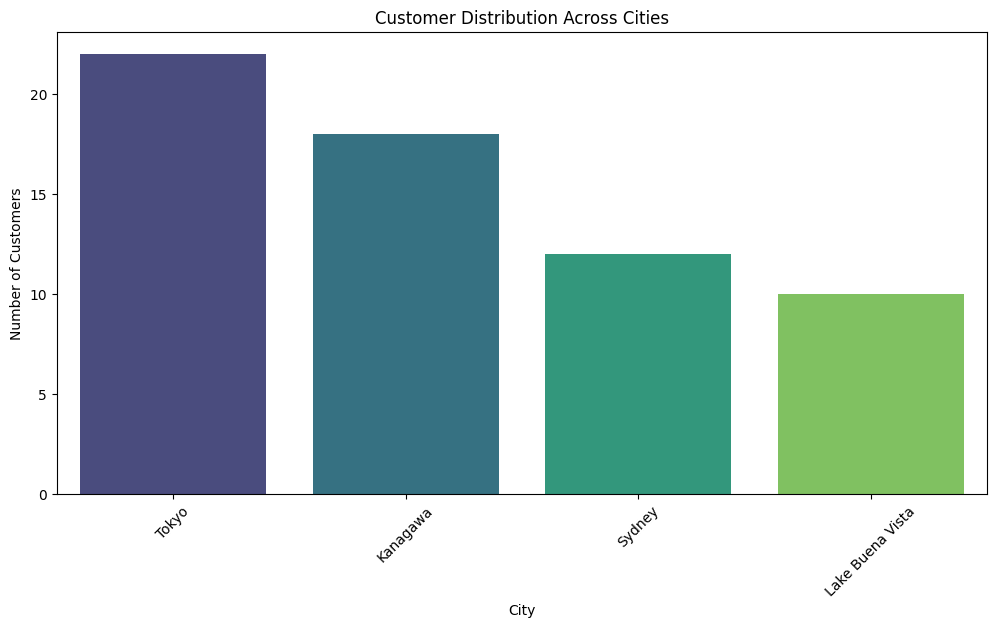

In [66]:

# Customer Analysis
# Identify the total number of customers city wise using the size function(calculate the number of elements in each group)
customer_data_citywise = customer_data.groupby('city').size()

print(customer_data_citywise)

# Explore the distribution of customers across different cities
city_distribution = customer_data['city'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=city_distribution.index, y=city_distribution.values, palette='viridis') #here palette= 'viridis' reperesent a set of colors 
plt.title('Customer Distribution Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)      # here .xticks function within the matplotlib to deal with the x axis labels



plt.show()

## INTERFERENCES:

- ### Tokyo has the highest number of customer followed by kanagawa,sydney and least is the Lake Buena Vista.

In [32]:
# Identify the most frequent customers based on their order history
most_frequent_customers = order_data.groupby('customer_id').size().sort_values(ascending=False).head(5)

print(most_frequent_customers )

customer_id
C1013    3
C1005    3
C1009    3
C1010    3
C1003    2
dtype: int64


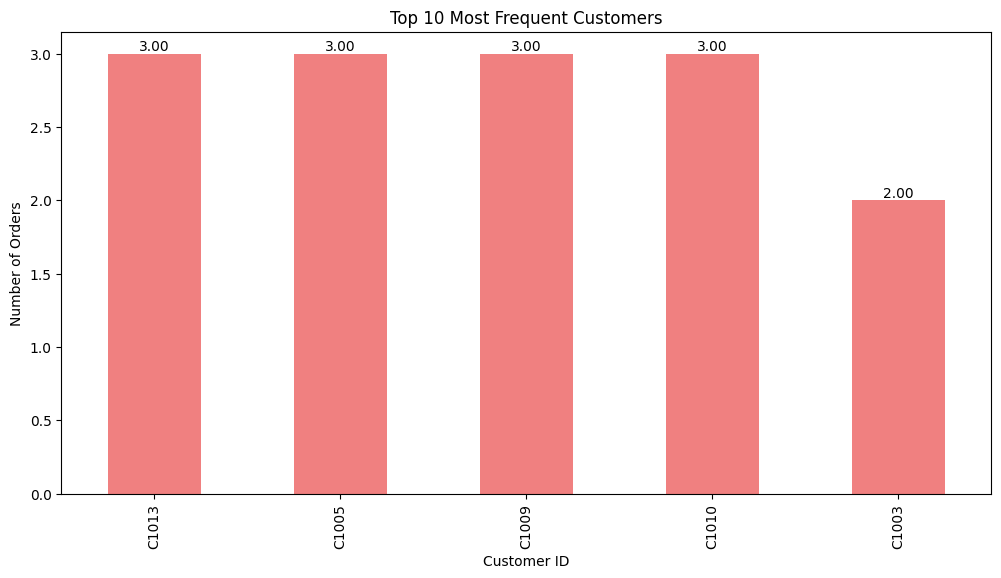

In [33]:
#Top 10 most frequent customers
plt.figure(figsize=(12, 6))
most_frequent_customers.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Most Frequent Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')

# Adding data labels to the bar plot
for index, value in enumerate(order_data.groupby('customer_id').size().sort_values(ascending=False).head(5)):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')



plt.show()

## INTERFERENCES:

- ### here we can see Product ID C1013 follwed by C1005,C1009 have more number of orders and C1003 has the lowest.

## PRODUCT ANALYSIS

category
Electronics    32
Appliance      20
Furniture       9
Name: count, dtype: int64


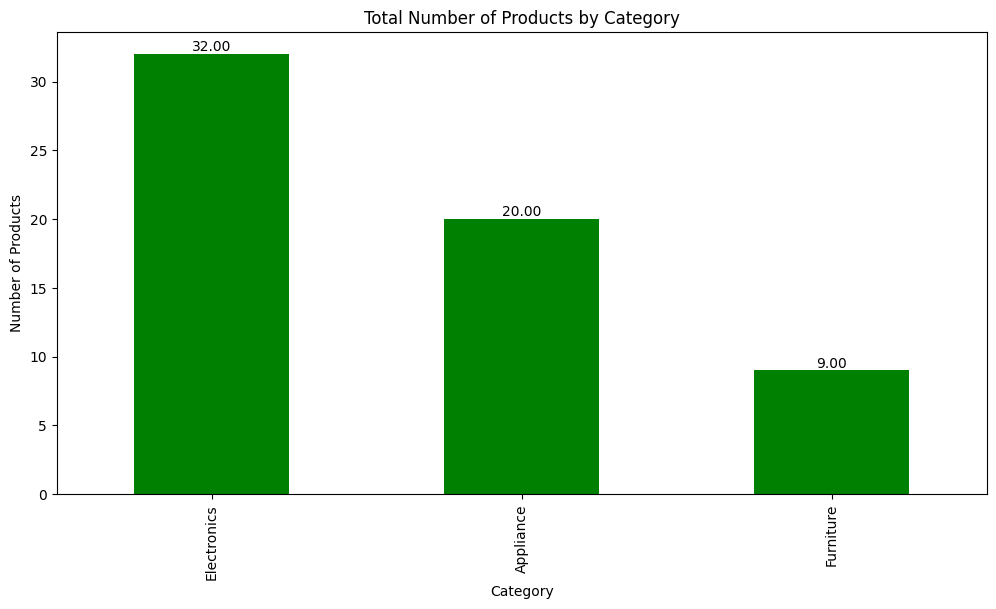

In [34]:
# Determine the total number of products available by category
products_by_category = product_data['category'].value_counts()
print(products_by_category )

# Plotting the bar graph
plt.figure(figsize=(12, 6))
products_by_category.plot(kind='bar', color='green')
plt.title('Total Number of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')

# Adding data labels to the bar plot
for index, value in enumerate(product_data['category'].value_counts()):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')


plt.show()

## INTERFERENCES:

- ### Electronics has the highest the number of products and furniture has the lowest

category     sub_category 
Appliance    Electronics      20
Electronics  Computers         9
             Wearables         5
             Audio             3
             Entertainment     3
             Accessories       2
             Tablets           2
             Printers          1
             TVs               1
             Photography       1
             Mobiles           1
             computer          1
             phone             1
             Consoles          1
             Cameras           1
Furniture    Lamps             2
             Chairs            2
             Desks             1
             Furniture         1
             Sofas             1
             Tables            1
             chairs            1
Name: count, dtype: int64


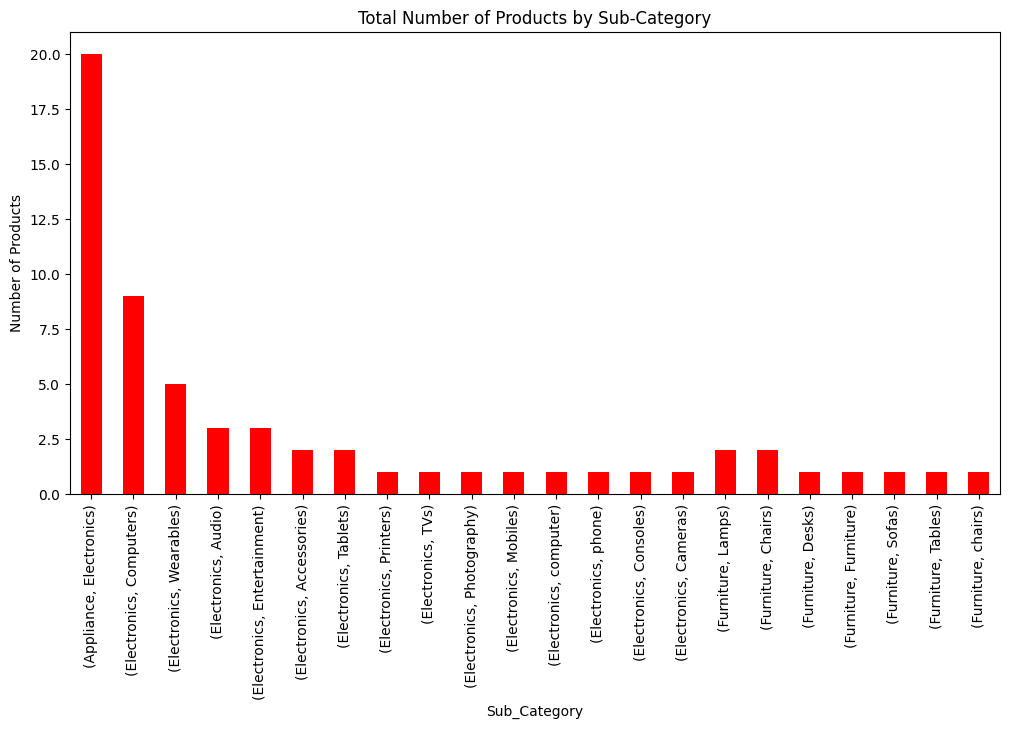

In [35]:
# Analyzethe distribution of products across sub-categories
products_distribution_by_sub_category = product_data.groupby('category')['sub_category'].value_counts()
print(products_distribution_by_sub_category)

# plotting the bar graph
plt.figure(figsize=(12, 6))
products_distribution_by_sub_category.plot(kind='bar', color='red')
plt.title('Total Number of Products by Sub-Category')
plt.xlabel('Sub_Category')
plt.ylabel('Number of Products')
plt.show()

## INTERFERENCES:

- ### Appliances has the highest number of products with  20 closely follwed by compuers with 9 and the lowest sub category is chairs

In [36]:
# HERE'Stock' is the column containing stock levels in our  PRODUCT dataframe
low_stock_threshold = 15  # WE can adjust this threshold based on our definition of low stock

# Identify products with low stock levels
low_stock_products = product_data[product_data['stock'] < low_stock_threshold]
print(low_stock_products )

   product_id         product_name     category sub_category  original_price  \
0        P102                Chair    Furniture       Chairs         20000.0   
3        P105              Blender    Appliance  Electronics           500.0   
10       P112                chair    Furniture       chairs          1000.0   
12       P114         Refrigerator    Appliance  Electronics         20000.0   
30       P132             Sofa Set    Furniture    Furniture         50000.0   
33       P135           Dishwasher    Appliance  Electronics         18000.0   
39       P141              Printer  Electronics    Computers         12000.0   
42       P144  External Hard Drive  Electronics    Computers          5000.0   
46       P148               Tablet  Electronics    Computers         30000.0   

    selling_price  stock  
0         15000.0     10  
3           450.0     10  
10          800.0     10  
12        18000.0     12  
30        45000.0     10  
33        15000.0     12  
39        

   product_id         product_name     category sub_category  original_price  \
0        P102                Chair    Furniture       Chairs         20000.0   
3        P105              Blender    Appliance  Electronics           500.0   
10       P112                chair    Furniture       chairs          1000.0   
12       P114         Refrigerator    Appliance  Electronics         20000.0   
30       P132             Sofa Set    Furniture    Furniture         50000.0   
33       P135           Dishwasher    Appliance  Electronics         18000.0   
39       P141              Printer  Electronics    Computers         12000.0   
42       P144  External Hard Drive  Electronics    Computers          5000.0   
46       P148               Tablet  Electronics    Computers         30000.0   

    selling_price  stock  
0         15000.0     10  
3           450.0     10  
10          800.0     10  
12        18000.0     12  
30        45000.0     10  
33        15000.0     12  
39        

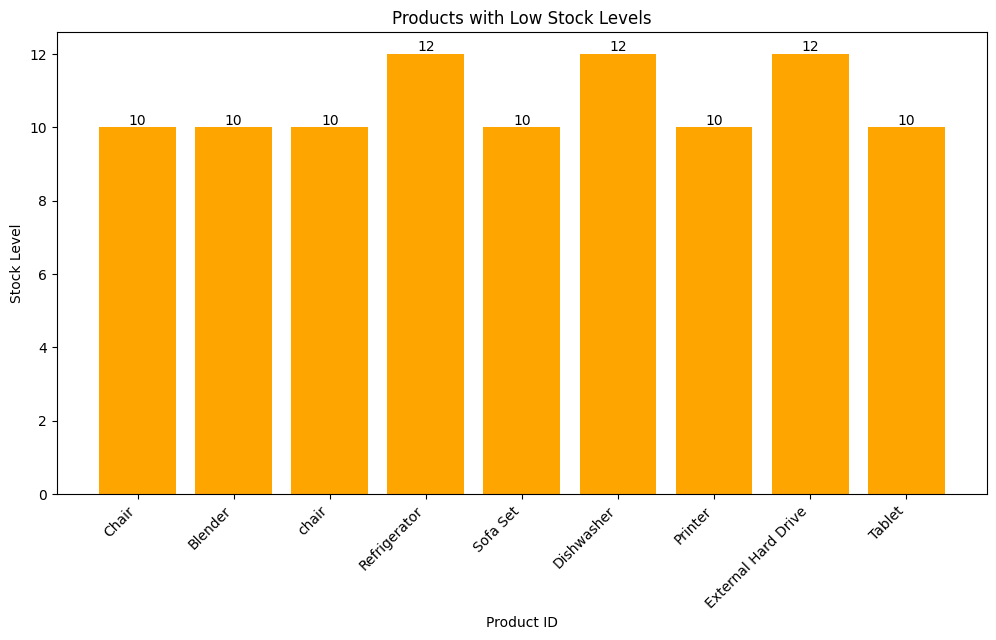

In [37]:
# HERE'Stock' is the column containing stock levels in our PRODUCT dataframe
low_stock_threshold = 15  # WE can adjust this threshold based on our definition of low stock

# Identify products with low stock levels
low_stock_products = product_data[product_data['stock'] < low_stock_threshold]
print(low_stock_products)

# Bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(low_stock_products['product_name'], low_stock_products['stock'], color='orange')
plt.title('Products with Low Stock Levels')
plt.xlabel('Product ID')
plt.ylabel('Stock Level')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adding data labels to the bar plot
for bar, value in zip(bars, low_stock_products['stock']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value}', ha='center', va='bottom')

plt.show()


## INTERFERENCES:**

-  #### The bar plot visually represents products with low stock levels, highlighting those whose stock falls below a specified threshold LIKE here it is 15.
-  #### In this example, products are color-coded in orange, making it easy to identify and prioritize items requiring attention due to their lower stock quantities.
- ####  This visualization provides a quick overview for inventory management, allowing stakeholders to promptly address and restock products at risk of running out.WE can see like chair. refrigerator,printer etc are low stock level.

In [38]:
# here 'Price' is the column containing product prices in our dataframe
price_statistics = {
'average_price' : product_data['selling_price'].mean(),
'maximum_price' : product_data['selling_price'].max(),
'minimum_price' : product_data['selling_price'].min()
}

print("\nCalculate the average, maximum, and minimum prices for products:")
print(price_statistics)


Calculate the average, maximum, and minimum prices for products:
{'average_price': 17774.62262295082, 'maximum_price': 70000.0, 'minimum_price': 450.0}


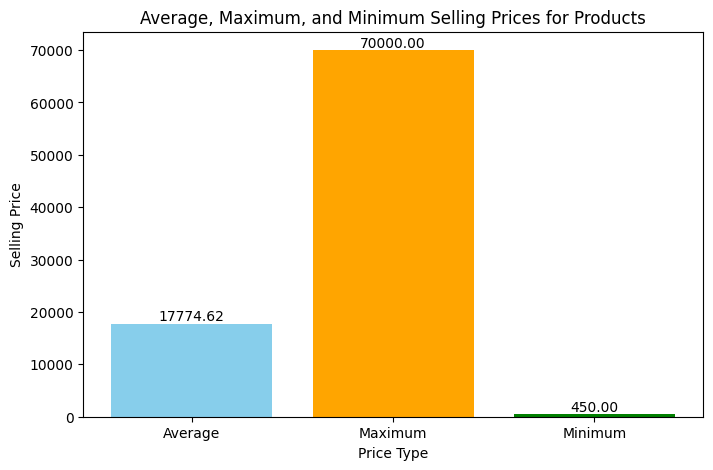

In [39]:
# Calculate average, maximum, and minimum selling prices
average_price = product_data['selling_price'].mean()
maximum_price = product_data['selling_price'].max()
minimum_price = product_data['selling_price'].min()

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(['Average', 'Maximum', 'Minimum'], [average_price, maximum_price, minimum_price], color=['skyblue', 'orange', 'green'])
plt.title('Average, Maximum, and Minimum Selling Prices for Products')
plt.xlabel('Price Type')
plt.ylabel('Selling Price')

# Adding data labels to the bar plot
for bar, value in zip(bars, [average_price, maximum_price, minimum_price]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

plt.show()


## Interferences:**

- #### The bar plot illustrates key summary statistics of product prices, showcasing the average, maximum, and minimum values. 
- #### The distinct colors, such as orange for average,green for maximum, and red for minimum prices, enhance visual clarity. 
- #### This visualization effectively communicates the central tendency and price range, offering a quick and insightful overview of the product pricing distribution.


In [40]:
# Merge DataFrames to get product-wise information
merged_df = pd.merge(order_data, product_data, on='product_id', how='left')


# Calculate the top 10 orders product-wise
top_orders_product_wise = merged_df.groupby('product_name')['quantity'].sum().nlargest(10)

print("Top 10 orders product-wise:\n", top_orders_product_wise)

Top 10 orders product-wise:
 product_name
Tablet             7.0
Vacuum Cleaner     7.0
Smartwatch         5.0
Air Purifier       4.0
Coffee Maker       4.0
Desk               4.0
Desk Lamp          4.0
Fitness Tracker    4.0
Microwave          4.0
Television         4.0
Name: quantity, dtype: float64


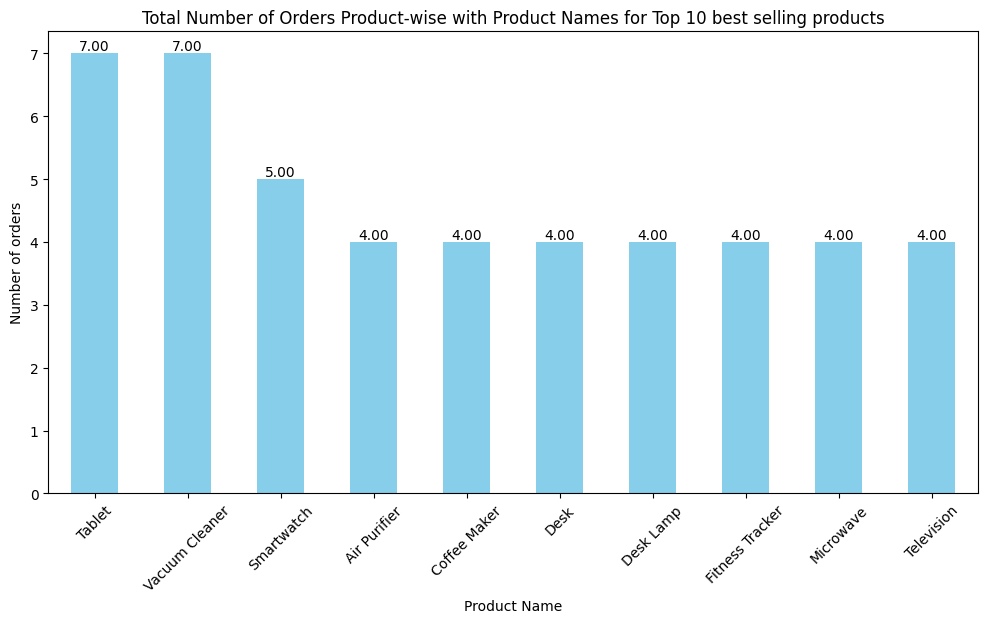

In [41]:
# Merge DataFrames to get product-wise information
merged_df = pd.merge(order_data, product_data, on='product_id', how='left')

# Product Performance
# Identify the top 10 best-selling products
top_selling_products = merged_df.groupby('product_name')['quantity'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_selling_products.plot(kind='bar', color='skyblue')
plt.title('Total Number of Orders Product-wise with Product Names for Top 10 best selling products')
plt.xlabel('Product Name')
plt.ylabel('Number of orders')
plt.xticks(rotation=45)

# Adding data labels to the bar plot
for index, value in enumerate( merged_df.groupby('product_name')['quantity'].sum().nlargest(10)):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()


## Interferences:**

 - #### The bar plot illustrates the top 10 products based on the number of orders, providing a snapshot of the most frequently purchased items. tablet and Vacuum cleaner exhibit the highest demand, with Product smartwatch closely following. 
- ### The visualization aids in identifying popular products, offering valuable insights for inventory management and marketing strategies to capitalize on customer preferences and optimize stock levels.

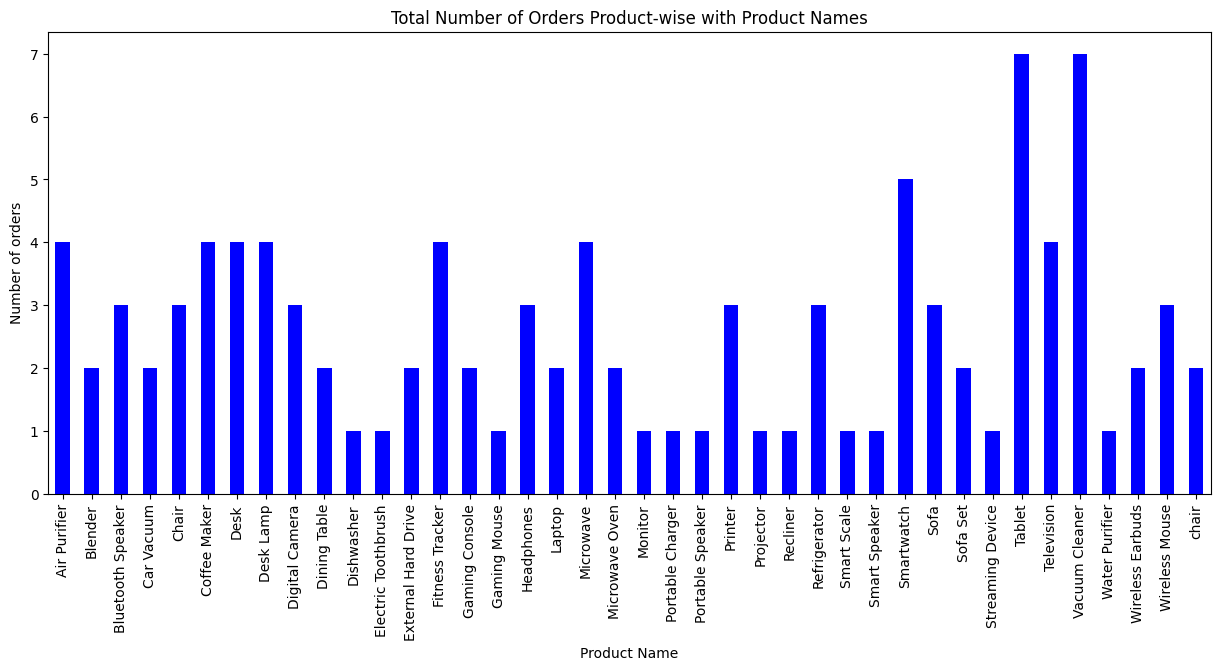

In [42]:
# Merge DataFrames to get product-wise information
merged_df = pd.merge(order_data, product_data, on='product_id', how='left')

# Product Performance
# Identify the top 10 best-selling products
top_selling_products = merged_df.groupby('product_name')['quantity'].sum()
plt.figure(figsize=(15, 6))
top_selling_products.plot(kind='bar', color='blue')
plt.title('Total Number of Orders Product-wise with Product Names')
plt.xlabel('Product Name')
plt.ylabel('Number of orders')
plt.xticks(rotation=90)
plt.show()


## Interferences:**

- #### The bar plot illustrates the total products based on the number of orders, providing a snapshot of the most frequently purchased items.
- #### Tablet and Vacuum cleaner exhibit the highest demand, with Product smartwatch closely following.
- #### The visualization aids in identifying popular products, offering valuable insights for inventory management and marketing strategies to capitalize on customer preferences and optimize stock levels.


Order status distribution:
 order_status
Delivered    28
Pending      25
Shipped      16
Cancelled     6
Returned      1
Name: count, dtype: int64


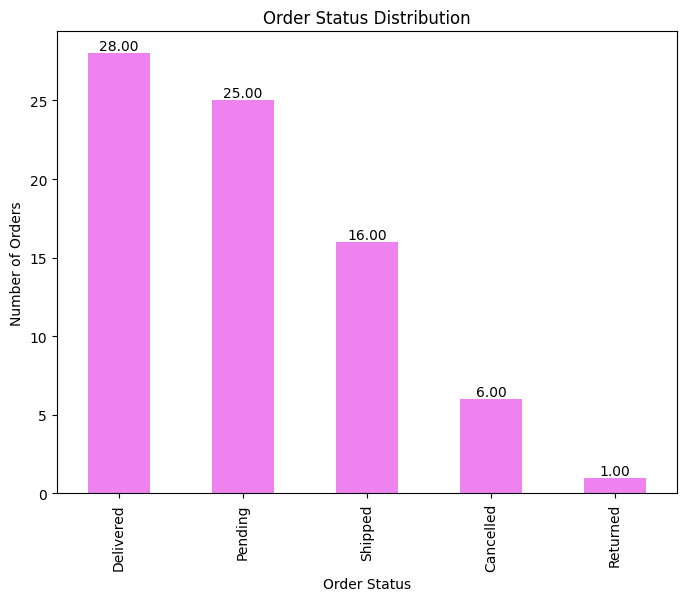

In [43]:
# Analyze the order status distribution
order_status_distribution = order_data['order_status'].value_counts()

print("\nOrder status distribution:\n", order_status_distribution)

# Plotting the distribution
plt.figure(figsize=(8, 6))
order_status_distribution.plot(kind='bar', color='violet')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')

# Adding data labels to the bar plot
for index, value in enumerate( order_data['order_status'].value_counts()):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

## Interferences:**

#### The bar plot depicting the order status distribution provides a clear visual representation of the frequency of each status category, such as 'pending' or 'delivered.Here we can see delivered ordered is more than pending and returned is less.

In [44]:
# Identify the most popular products based on order quantity
most_popular_products = order_data.groupby('product_id')['quantity'].sum().idxmax()

print("\nMost popular products based on order quantity (ProductID):", most_popular_products)


Most popular products based on order quantity (ProductID): P108


In [45]:
# Merge DataFrames to get product-wise information
merged_df = pd.merge(order_data, product_data, on='product_id', how='left')

# Identify the most popular products based on order quantity
most_popular_products = merged_df.groupby('product_name')['quantity'].sum().idxmax()

print("\nMost popular products based on order quantity (ProductID):", most_popular_products)



Most popular products based on order quantity (ProductID): Tablet


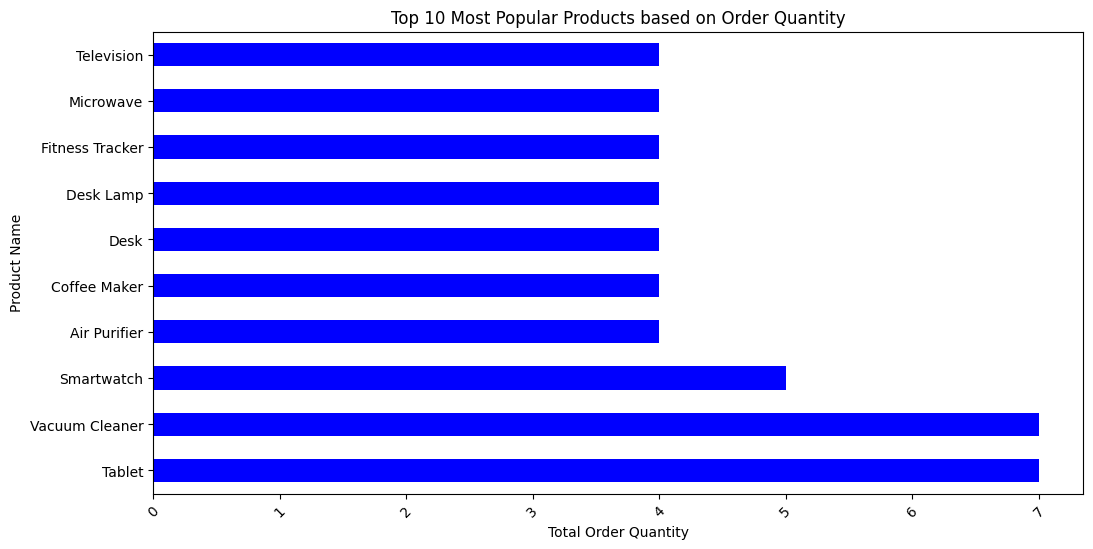

In [46]:
# Product Performance
# Identify the top 10 best-selling products
top_selling_products = merged_df.groupby('product_name')['quantity'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_selling_products.plot(kind='barh', color='blue')
plt.title('Top 10 Most Popular Products based on Order Quantity')
plt.xlabel('Total Order Quantity')
plt.ylabel('Product Name')
plt.xticks(rotation=45)
plt.show()

## Interferences:**

- #### The bar plot visually represents the popularity of different products based on order quantity, showcasing a clear hierarchy of the most to least popular items.
- #### For instance, Product Tablet and Vacuum cleaner exhibits the highest order quantity, making it the most popular, followed by Product smirtwatch. This visualization aids in quickly identifying and understanding the distribution of product popularity within the dataset.

# Sales Analysis

product_name
Tablet             297000.0
Television         208000.0
Sofa Set           180000.0
Desk               148000.0
Smartwatch         140000.0
Vacuum Cleaner     139000.0
Laptop             110000.0
Air Purifier       100000.0
Microwave           78000.0
Fitness Tracker     74000.0
Name: Total_Revenue, dtype: float64


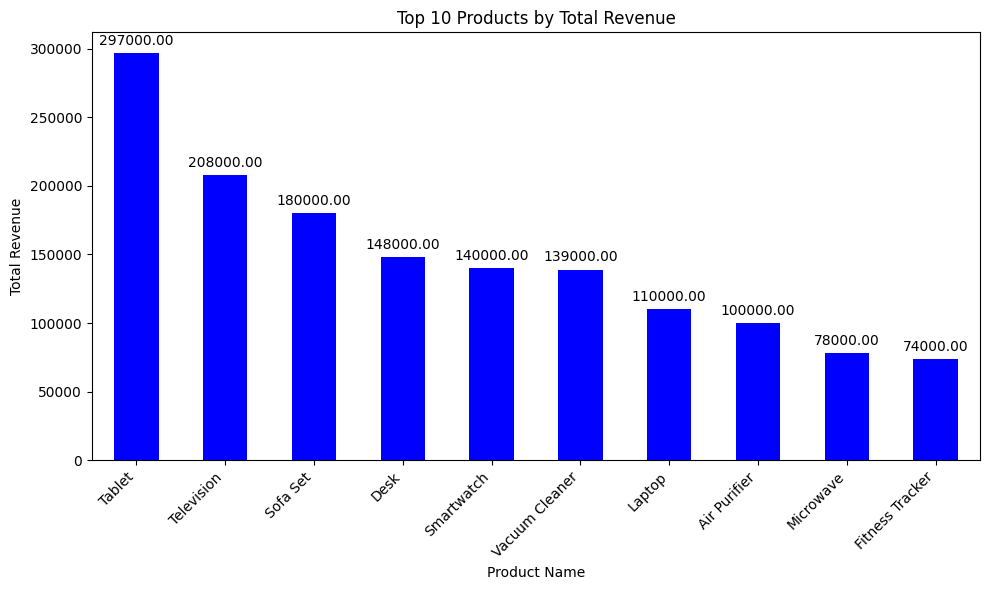

In [47]:

# Merge dataframes
merged_df = pd.merge(order_data, product_data, on='product_id')
merged_df['Total_Revenue'] = merged_df['quantity'] * merged_df['total_price']

# Group by product and sum total prices
revenue_by_product = merged_df.groupby('product_name')['Total_Revenue'].sum().sort_values(ascending=False)

# Select top 10 products
top_10_products = revenue_by_product.head(10)

# Display the top 10 products by total revenue
print(top_10_products)

# Plotting a bar plot to show the total revenue
ax = top_10_products.plot(kind='bar', color='blue', figsize=(10, 6))

# Adding data labels to the bars
for i, value in enumerate(top_10_products):
    ax.text(i, value + 0.02 * max(top_10_products), f'{value:.2f}', ha='center')

plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


## INTEREFERENCES:

- #### The bar plot depicting the total revenue generated from orders product-wise provides a visual overview of the contribution of each product to the overall revenue.
- ####  This analysis helps identify high-performing products, enabling strategic business decisions such as optimizing inventory, marketing efforts, or product pricing for enhanced profitability. Here we can see that Tablet  has highest revenue and after that television and so on.


Total revenue generated from all orders: 2284400.0


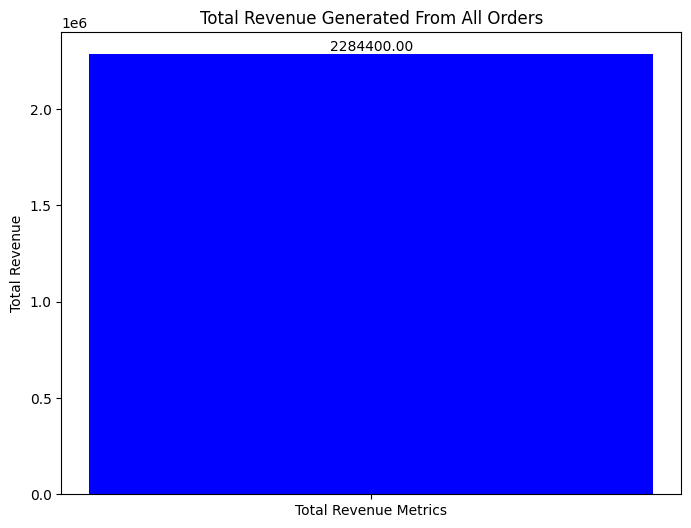

In [48]:

# Calculate total revenue generated from all orders
total_revenue_all_orders = merged_df['Total_Revenue'].sum()

print("\nTotal revenue generated from all orders:", total_revenue_all_orders)

# Plotting a bar graph for total revenue generated from all orders
plt.figure(figsize=(8, 6))
plt.bar(['Total Revenue Metrics'], [total_revenue_all_orders], color='blue')
plt.title('Total Revenue Generated From All Orders')
plt.ylabel('Total Revenue')

# Adding data label to the bar
plt.text('Total Revenue Metrics', total_revenue_all_orders, f'{total_revenue_all_orders:.2f}', ha='center', va='bottom')

plt.show()


## INTEREFERENCES:

- ### The bar plot of total revenue provides a concise visual representation of the overall financial performance, showcasing the cumulative revenue generated from all orders.
- ### In a single glance, it effectively communicates the magnitude of the business's financial success, serving as a key indicator for assessing the company's economic health and growth.


Total revenue product category-wise percentage:
 category
Appliance      23.459114
Electronics    49.553493
Furniture      26.987393
Name: Total_Revenue, dtype: float64


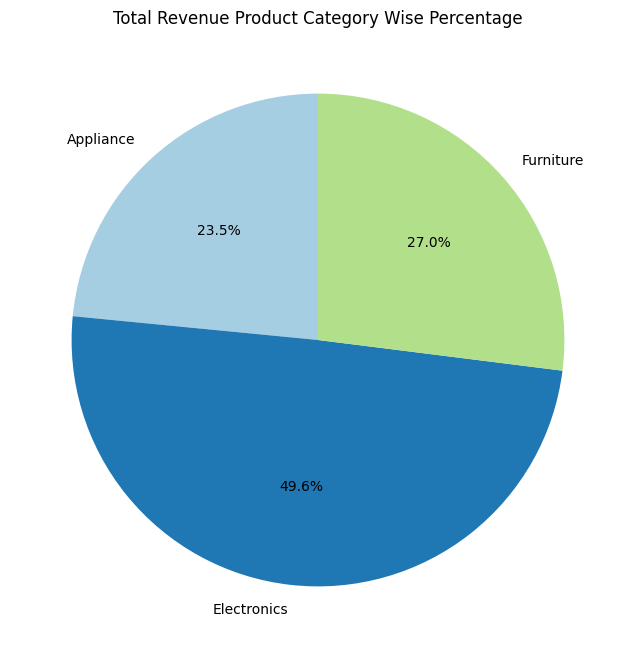

In [49]:
# Calculate total revenue product category-wise percentage
category_wise_revenue = merged_df.groupby('category')['Total_Revenue'].sum()
revenue_percentage = (category_wise_revenue / total_revenue_all_orders) * 100

print("\nTotal revenue product category-wise percentage:\n", revenue_percentage)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(revenue_percentage, labels=revenue_percentage.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Total Revenue Product Category Wise Percentage')
plt.show()

## INTEREFERENCES:

- #### The pie chart illustrates the distribution of total revenue across different product categories.
- #### It vividly highlights the relative contribution of each category to the overall revenue.
- #### For instance, Electronics appears to have the highest share with 49.6% , comprising a significant percentage of the total revenue, while Appliances and furniture contribute comparatively smaller portions with  23.7% and 27.0% respectively.
- #### This visualization aids in quickly identifying the key revenue-generating product categories within the dataset.

   product_id         product_name     category   sub_category  \
4        P106            Laptop HP  Electronics      Computers   
5        P107       Samsung Galaxy  Electronics        Mobiles   
9        P111           Television  Electronics            TVs   
28       P130           Television  Electronics  Entertainment   
1        P103               Laptop  Electronics       computer   
..        ...                  ...          ...            ...   
56       P158  Electric Toothbrush    Appliance    Electronics   
57       P159           Car Vacuum    Appliance    Electronics   
58       P160     Portable Speaker    Appliance    Electronics   
59       P161          Smart Scale    Appliance    Electronics   
60       P162     Streaming Device  Electronics    Accessories   

    original_price  selling_price  stock    Profit  
4         67200.00       55000.99     50 -12199.01  
5         60000.99       49000.99    100 -11000.00  
9         60000.00       50000.00     40 -10000.

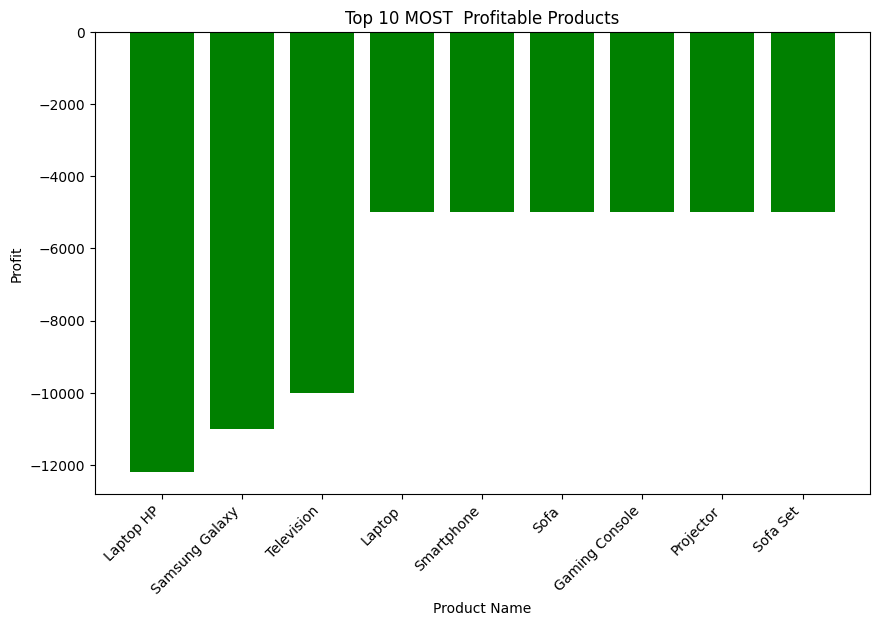

In [67]:
# Assuming you have a DataFrame named 'products' with columns 'Product', 'Original_Price', and 'Selling_Price'
product_data['Profit'] = product_data['selling_price'] - product_data['original_price'].nlargest(10)
#sorted the data and print it
sorted_product_data = product_data.sort_values(by='Profit')
print(sorted_product_data)

#plotting a bar graph
plt.figure(figsize=(10, 6))
plt.bar(sorted_product_data['product_name'], sorted_product_data['Profit'], color='green')
plt.xlabel('Product Name')
plt.ylabel('Profit')
plt.title('Top 10 MOST  Profitable Products')
plt.xticks(rotation=45, ha='right')
plt.show()

## INTEREFERENCES:

- ### The bar plot illustrates the profitability of each product by showcasing the difference between the original and selling prices.
- ### Products with higher bars indicate a greater profit margin, providing a clear visual representation of the most financially lucrative items in the inventory.
- ###  This analysis aids in strategic decision-making and resource allocation by highlighting key contributors to overall profit.

 # Customer Order Patterns

In [51]:
# Merge DataFrames to get product-wise information
merged_df = pd.merge(order_data, product_data, on='product_id', how='left')


# Identify product names with the highest and lowest order quantities
product_quantities = merged_df.groupby('product_name')['quantity'].sum()
highest_product = product_quantities.idxmax()
lowest_product = product_quantities.idxmin()

print("Product with the highest order quantity:", highest_product)
print("Product with the lowest order quantity:", lowest_product)

Product with the highest order quantity: Tablet
Product with the lowest order quantity: Dishwasher


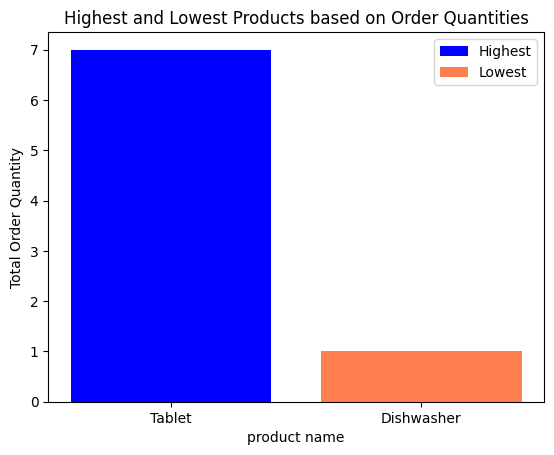

In [52]:
# Bar for the highest product
plt.bar(highest_product, product_quantities[highest_product], color='blue', label='Highest')

# Bar for the lowest product
plt.bar(lowest_product, product_quantities[lowest_product], color='coral', label='Lowest')

plt.title('Highest and Lowest Products based on Order Quantities')
plt.xlabel('product name')
plt.ylabel('Total Order Quantity')
plt.legend()
plt.show()


## INTEREFERENCES:

- ### The bar chart illustrates the product with the highest order quantity (Tablet) and the one with the lowest order quantity (Dishwasher).
- ### Tablet stands out with significantly higher orders, while dishwasher has the lowest order quantity in the dataset.

In [53]:
# Merge DataFrames to get customers name
merged_df = pd.merge(order_data, customer_data, on='customer_id', how='left')

# Identify customers with the highest and lowest order quantities by customer name
customer_quantities = merged_df.groupby('name')['quantity'].sum()
highest_customer = customer_quantities.idxmax()
lowest_customer = customer_quantities.idxmin()

print("Customer with the highest order quantity:", highest_customer)
print("Customer with the lowest order quantity:", lowest_customer)

Customer with the highest order quantity: Oliver
Customer with the lowest order quantity: Aiden


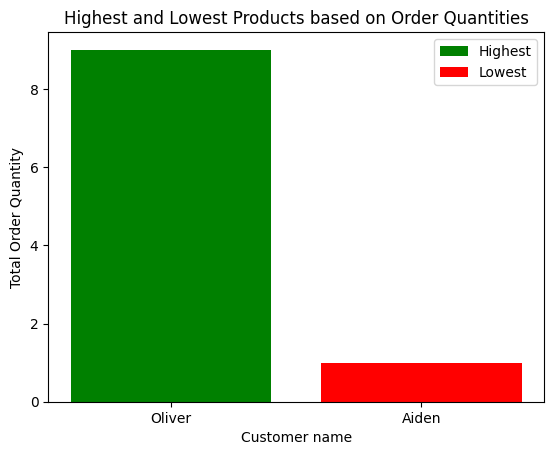

In [54]:
# Bar for the highest product
plt.bar(highest_customer, customer_quantities[highest_customer], color='green', label='Highest')

# Bar for the lowest product
plt.bar(lowest_customer, customer_quantities[lowest_customer], color='red', label='Lowest')

plt.title('Highest and Lowest Products based on Order Quantities')
plt.xlabel('Customer name')
plt.ylabel('Total Order Quantity')
plt.legend()
plt.show()

## INTERFERENCES:**

 * ### The bar chart illustrates the customer with the highest order quantity (Oliver) and the one with the lowest order quantity (Aiden)**. 

In [55]:
# Determine the most preferred payment modes
highest_payment_modes = order_data['payment_mode'].value_counts().idxmax()
lowest_payment_modes = order_data['payment_mode'].value_counts().idxmin()

print("highest payment mode:",highest_payment_modes )
print("lowest payement mode:",lowest_payment_modes )

highest payment mode: Online
lowest payement mode: COD


payment_mode
Online    43
COD       33
Name: count, dtype: int64


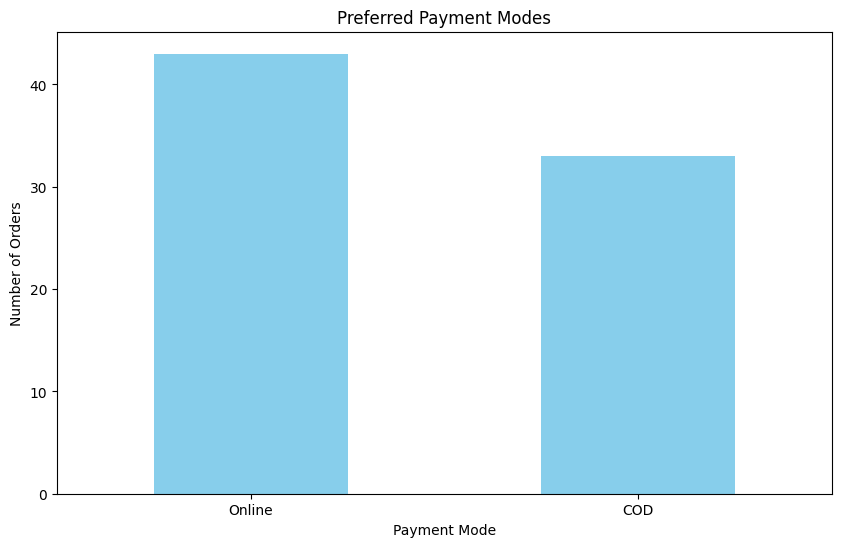

In [56]:
# Group by Payment_Mode and count occurrences
payment_mode_counts = order_data['payment_mode'].value_counts()
print(payment_mode_counts)

# Get the highest and lowest payment modes
highest_payment_mode = payment_mode_counts.idxmax()
lowest_payment_mode = payment_mode_counts.idxmin()

# Plot the bar chart for the highest and lowest payment modes
plt.figure(figsize=(10, 6))
payment_mode_counts.plot(kind='bar', color='skyblue')
plt.title('Preferred Payment Modes')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

 ## INSIGHTS:**

- ### The bar chart reveals that "COD" (Cash on Delivery) is the most preferred payment mode with 43 orders, significantly surpassing other modes. Conversely, "Online" payments are the least favored among customers with 33 orders.

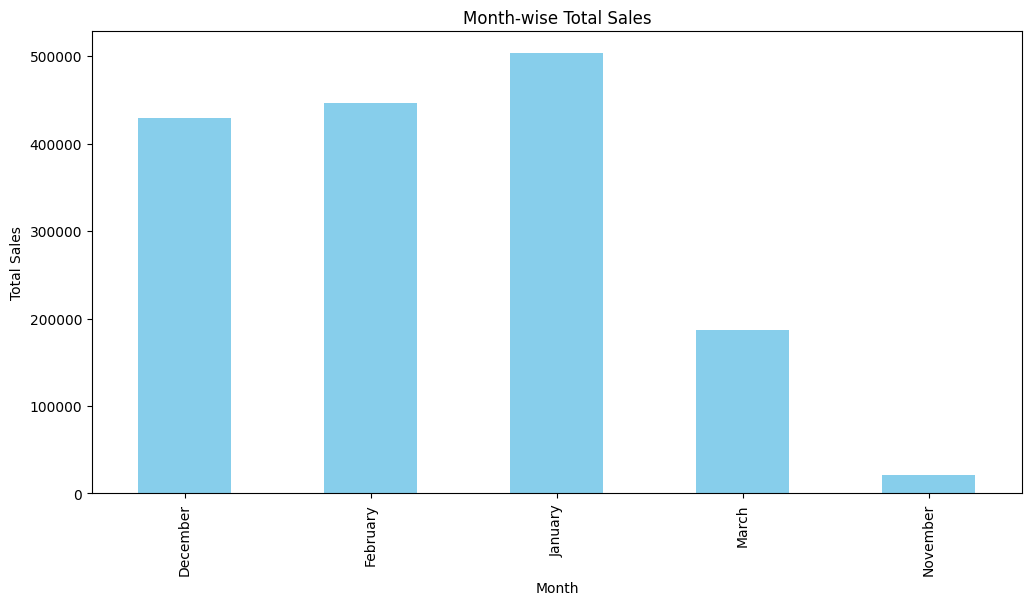

In [57]:
#Time based Analysis
# Reset the index to make 'order_date' a column
order_data_reset = order_data.reset_index()

# Convert the 'order_date' column to datetime format
order_data_reset['order_date'] = pd.to_datetime(order_data_reset['order_date'])

# Extract month and year from the 'order_date' column
order_data_reset['month_year'] = order_data_reset['order_date'].dt.to_period('M')

# Extract month names
order_data_reset['month_name'] = order_data_reset['order_date'].dt.strftime('%B')

# Group by month and calculate the total sales
monthly_sales = order_data_reset.groupby([ 'month_name'])['total_price'].sum()

# Plotting
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Month-wise Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


## INSIGHTS:**

- #### The month-wise analysis of total sales reveals a consistent growth pattern throughout the year, with a notable peak in January, suggesting a potential seasonality effect.
- #### Additionally, a slight decline is observed in November, indicating a deviation from the overall ascending trend.


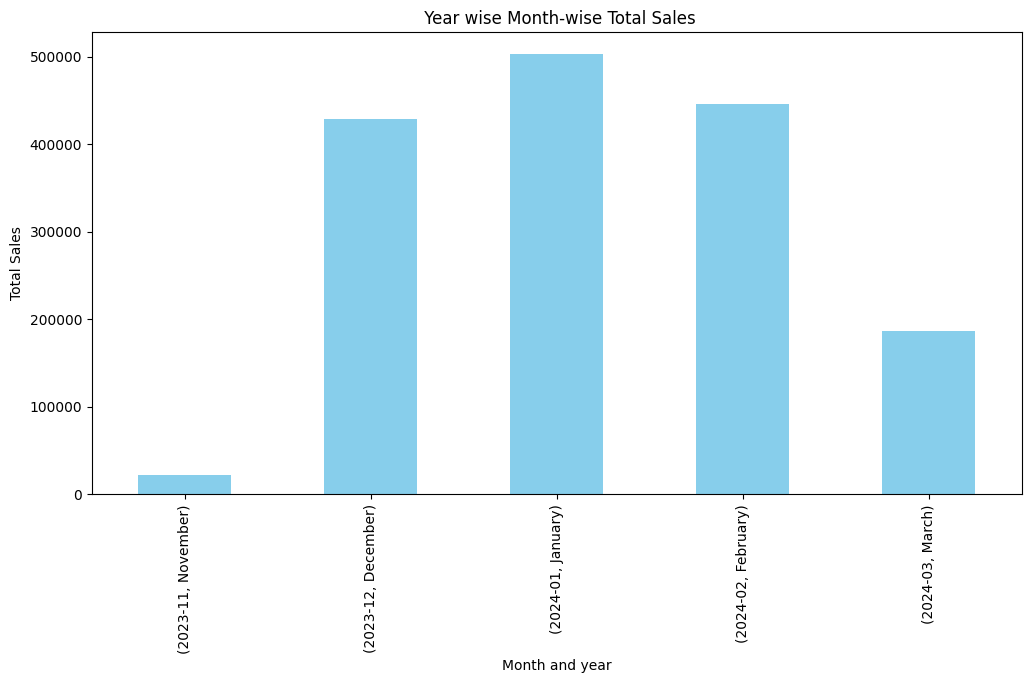

In [58]:
# Reset the index to make 'order_date' a column
order_data_reset = order_data.reset_index()

# Convert the 'order_date' column to datetime format
order_data_reset['order_date'] = pd.to_datetime(order_data_reset['order_date'])

# Extract month and year from the 'order_date' column
order_data_reset['year'] = order_data_reset['order_date'].dt.to_period('M')

# Extract month names
order_data_reset['month_name'] = order_data_reset['order_date'].dt.strftime('%B')

# Group by month and calculate the total sales
monthly_sales = order_data_reset.groupby([ 'year','month_name'])['total_price'].sum()

# Plotting
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title(' Year wise Month-wise Total Sales')
plt.xlabel('Month and year')
plt.ylabel('Total Sales')
plt.show()


## INSIGHTS:**

-  #### The year wise month-wise analysis of total sales reveals a consistent growth pattern throughout the year, with a notable peak in January, suggesting a potential seasonality effect.
-  #### Additionally, a slight decline is observed in November, indicating a deviation from the overall ascending trend.


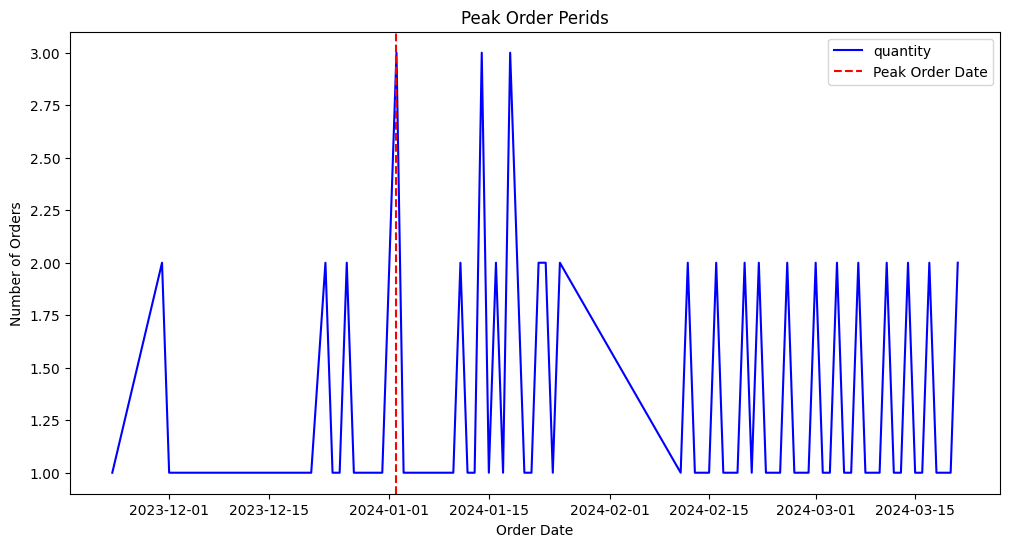

Peak Order Date: 2024-01-02


In [59]:

# Reset the index to make 'order_date' a column
order_data_reset = order_data.reset_index()

# Convert the 'order_date' column to datetime format
order_data_reset['order_date'] = pd.to_datetime(order_data_reset['order_date'])

# Extract date from the 'order_date' column
order_data_reset['date'] = order_data_reset['order_date'].dt.date

# Group by date and calculate the total sales
daily_sales = order_data_reset.groupby('date')['quantity'].sum()

# Identify the peak order date
peak_order_date = daily_sales.idxmax()

# Plotting line chart
plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line', color='blue')
plt.title('Peak Order Perids')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.axvline(x=peak_order_date, color='red', linestyle='--', label='Peak Order Date')
plt.legend()
plt.show()

print("Peak Order Date:", peak_order_date)


## INSIGHTS:**

- ### The line plot of daily order quantities reveals that [2nd january 2024] witnessed the highest peak in orders, indicating a notable surge in customer demand on that particular day.

Exploratory Data Analysis (EDA) and Visualization:

C:\Users\barun\AppData\Local\Temp\ipykernel_16596\3497289420.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_distribution.index, y=city_distribution.values, palette='viridis')


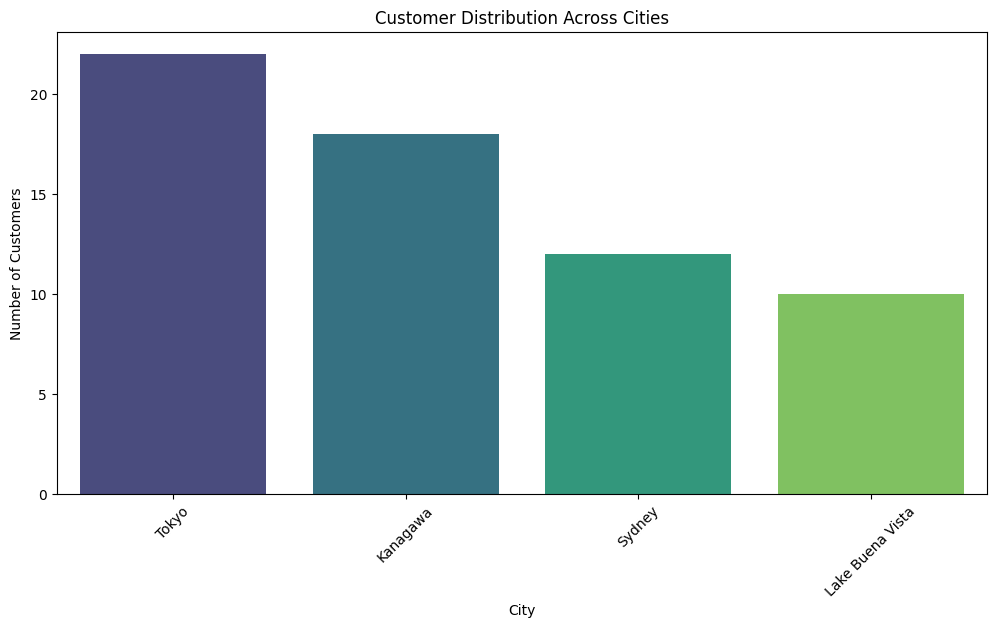

In [60]:
# Geographical Analysis
# Explore the distribution of customers across different cities
city_distribution = customer_data['city'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=city_distribution.index, y=city_distribution.values, palette='viridis')
plt.title('Customer Distribution Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

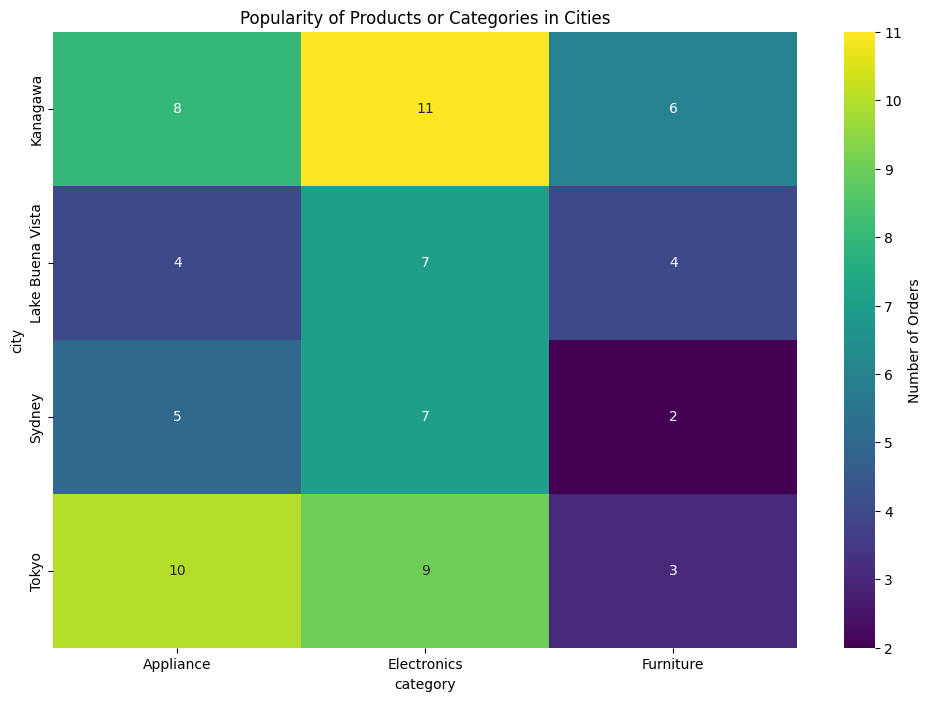

In [61]:
# Merge data to create a comprehensive DataFrame
merged_data = pd.merge(order_data, customer_data, on='customer_id')
merged_data = pd.merge(merged_data, product_data, on='product_id')

# Create a pivot table to get the count of products in each city
heatmap_data = merged_data.pivot_table(index='city', columns='category', values='quantity', aggfunc='count', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Number of Orders'})
plt.title('Popularity of Products or Categories in Cities')
plt.show()

 ## INSIGHTS:**

- #### The heatmap reveals the distribution of product category popularity across cities. In Tokyo, the "Electronics" category, particularly the "Computer" sub-category, is more popular, while in Lake Buena Vista, "Furniture" stands out, indicating a city-specific preference for certain product types.

C:\Users\barun\AppData\Local\Temp\ipykernel_16596\221155836.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quantity', y='product_name', data=top_products_details, palette='viridis')


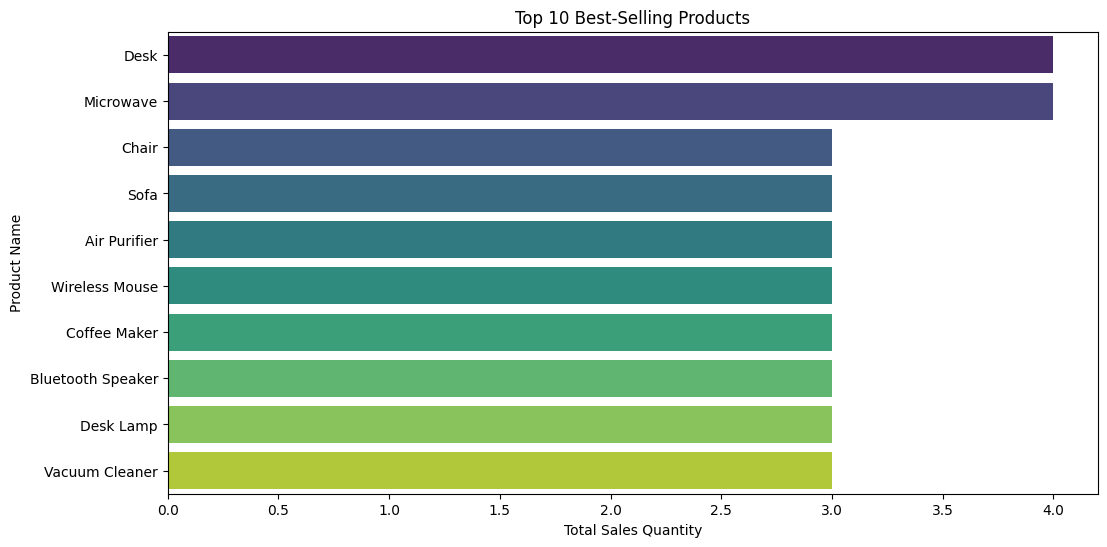

In [62]:
# Group by product_id and sum the quantity to get total sales for each product
top_products = order_data.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)

# Merge with product_data to get product details
top_products_details = pd.merge(top_products, product_data, how='left', on='product_id')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='quantity', y='product_name', data=top_products_details, palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Product Name')
plt.show()


## INSIGHTS:**

- ### The plot of the top 10 best-selling products reveals that desk and microwave is the highest-selling product followed by other products such as chair,sofa etc.

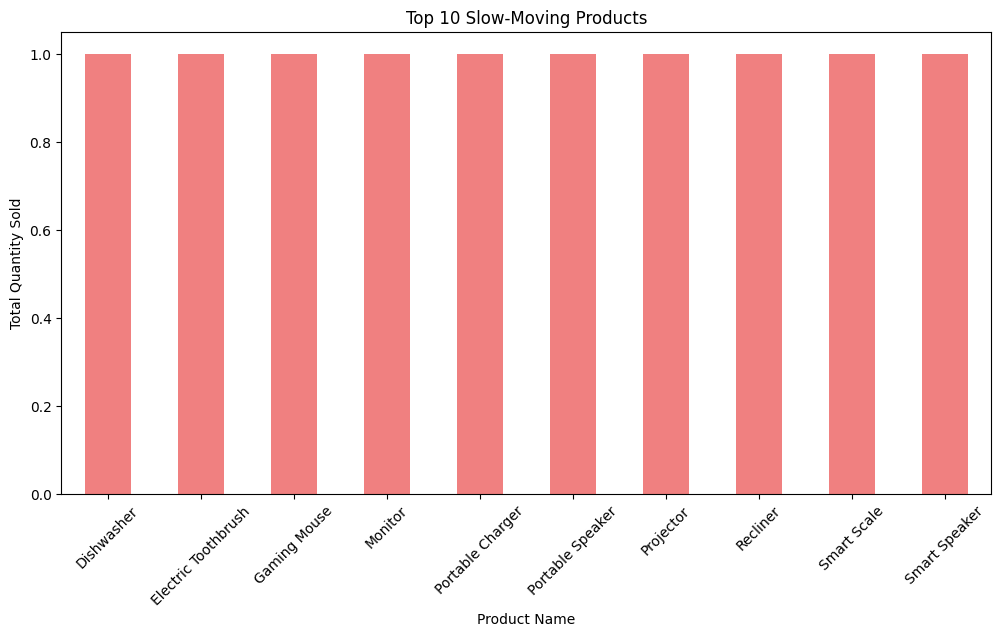

In [63]:
# Identify top 10 slow-moving products based on low sales
slow_moving_products = merged_data.groupby('product_name')['quantity'].sum().nsmallest(10)
plt.figure(figsize=(12, 6))
slow_moving_products.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Slow-Moving Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

 ## INSIGHTS:**

- ### The bar plot of the top 10 slow-moving products reveals the specific products with the lowest total sales, indicating items that may require attention in marketing or inventory management like dishwasher, monitor etc.. Understanding the performance of these products can help optimize strategies to boost their sales.

C:\Users\barun\AppData\Local\Temp\ipykernel_16596\262885343.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='Set1')


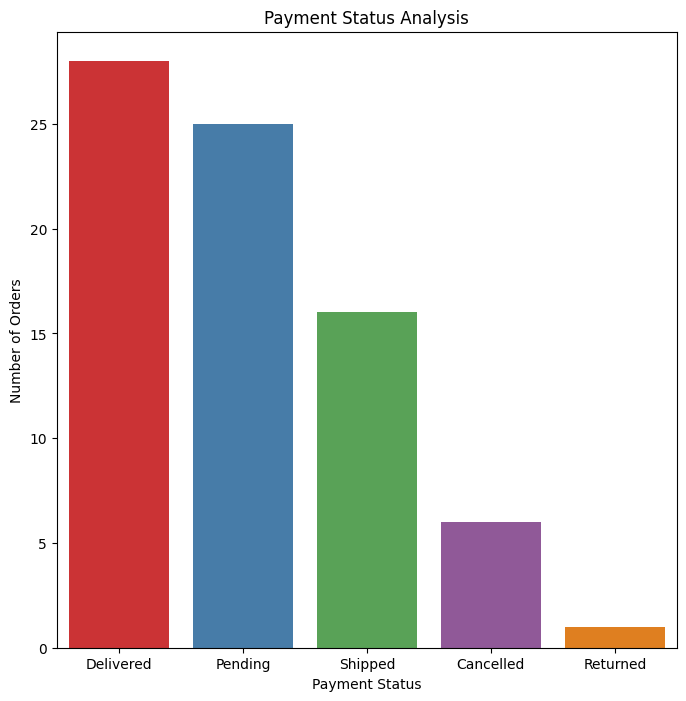

In [64]:
# Payment Analysis
# Display successful and pending payments order counts
payment_counts = order_data['order_status'].value_counts()
plt.figure(figsize=(8, 8))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='Set1')
plt.title('Payment Status Analysis')
plt.xlabel('Payment Status')
plt.ylabel('Number of Orders')
plt.show()

## INSIGHTS:**

- ### The bar plot depicting the order status distribution provides a clear visual representation of the frequency of each status category, such as 'pending' or 'delivered.Here we can see delivered ordered is more than pending and returned is less.

 ## CONCLUSION:**
- ### Summarize the key insights derived from the analysis. Provide recommendations for business improvement based on the identified patterns and trends..








## Customer Analysis:*
- #### Tokyo has the highest number of customers.
- ### Steve and Jackson are the most frequent customer.
 - #### retention rates remain stable over time.
 

## Payment Analysis:

- ### Most payments are successful, with only a few pending orders.

# Overall Conclusion:

 - ### The business is performing well, with Tokyo being a key market. The "Electronics" category, especially the "Laptop HP" product, is driving significant revenue.
   
 - ###  There's a need to address low stock levels in some categories in "furniture" and "Electronics," to avoid potential stockouts. 
 
 - ###  The business should focus on retaining and engaging with frequent customers.
 
- ### Time-based analysis highlights a peak in sales in january, suggesting potential seasonality.
  
- ###  Overall, the company should continue to monitor and optimize product offerings, stock levels, and customer engagement strategies to sustand enhance its current performance.
